<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

daily-climate-time-series-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
import zipfile
zip_file = zipfile.ZipFile('/content/daily-climate-time-series-data.zip', 'r')
zip_file.extractall('/content/')

In [13]:
data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [14]:
data.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [15]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day_name()
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,Tuesday
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,Wednesday
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,Thursday
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,Friday
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,Saturday


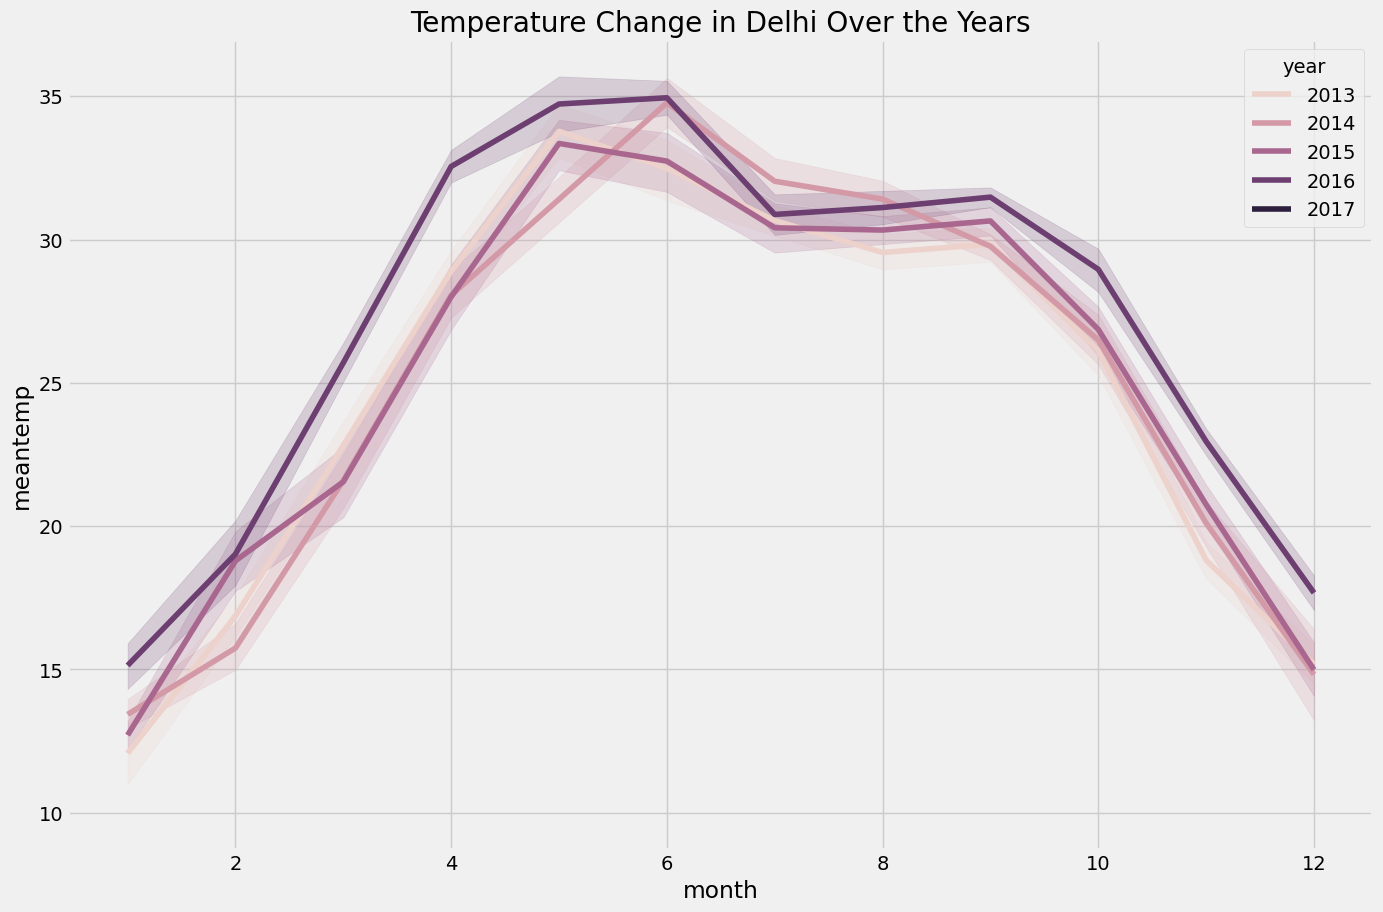

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data= data, x='month', y='meantemp', hue='year')
plt.show()

# Forecasting Weather

In [21]:
forecast_data = data.rename(columns={'date':'ds',
                                     'meantemp':'y'})
forecast_data.head()

,ds,y,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,Tuesday
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,Wednesday
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,Thursday
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,Friday
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,Saturday


In [22]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecast = model.make_future_dataframe(periods=365)
prediction = model.predict(forecast)
plot_plotly(model, prediction)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6teomjf8/blwf9tsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6teomjf8/p_6wi8ww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52673', 'data', 'file=/tmp/tmp6teomjf8/blwf9tsh.json', 'init=/tmp/tmp6teomjf8/p_6wi8ww.json', 'output', 'file=/tmp/tmp6teomjf8/prophet_modeltwkkkqam/prophet_model-20230718040556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
